In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pickle
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL/ipl.csv')

In [ ]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
columns_to_remove=['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
df['bat_team'].unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
consistent_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils']

In [ ]:
df=df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [ ]:
df=df[df['overs']>=5.0]

In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [ ]:
type(df['date'])

pandas.core.series.Series

In [ ]:

from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

TypeError: ignored

In [ ]:
encode_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])
encode_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
encode_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bowl_team_Chennai Super Kings', 'bowl_team_Deccan Chargers',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore'],
      dtype='object')

In [ ]:
encode_df=encode_df[['bat_team_Chennai Super Kings', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bowl_team_Chennai Super Kings', 'bowl_team_Deccan Chargers',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [ ]:
encode_df.head()

,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,date,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,0,5.1,59,0,222
33,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.2,59,1,222
34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.3,59,1,222
35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.4,59,1,222
36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.5,58,1,222


In [ ]:
encode_df.tail()

,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,date,runs,wickets,overs,runs_last_5,wickets_last_5,total
75884,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2017-05-19,106,9,18.1,29,4,107
75885,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2017-05-19,107,9,18.2,29,4,107
75886,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2017-05-19,107,9,18.3,28,4,107
75887,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2017-05-19,107,9,18.4,24,4,107
75888,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2017-05-19,107,10,18.5,23,5,107


In [ ]:
X_train=encode_df.drop(labels='total',axis=1)[encode_df['date'].dt.year<=2016]
X_test=encode_df.drop(labels='total',axis=1)[encode_df['date'].dt.year>=2017]

In [ ]:
X_train

,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,date,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,0,5.1,59,0
33,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.2,59,1
34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.3,59,1
35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.4,59,1
36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2008-04-18,61,1,5.5,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68357,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-05-22,134,7,19.2,38,2
68358,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-05-22,135,7,19.3,38,2
68359,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-05-22,137,7,19.4,39,2
68360,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-05-22,137,7,19.5,39,1


In [ ]:
Y_train=encode_df[encode_df['date'].dt.year<=2016]['total'].values
Y_test=encode_df[encode_df['date'].dt.year>=2017]['total'].values

In [ ]:
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,61,0,5.1,59,0
33,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,61,1,5.2,59,1
34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,61,1,5.3,59,1
35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,61,1,5.4,59,1
36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,61,1,5.5,58,1


In [ ]:
X_train.drop(labels='date',axis=1,inplace=True)

KeyError: ignored

In [ ]:
X_test.drop(labels='date',axis=1,inplace=True)

In [ ]:
X_test.head()

,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Deccan Chargers,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,runs,wickets,overs,runs_last_5,wickets_last_5
69391,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,33,1,5.1,28,1
69392,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,37,1,5.2,28,1
69393,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,41,1,5.3,32,1
69394,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,41,1,5.4,31,1
69395,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,41,2,5.5,27,2


In [50]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

model.fit(X_train, Y_train)
predict=model.predict(X_test)

In [62]:
print(predict)

[163.40674716 166.621895   169.55783312 ... 101.49837324 101.15267533
  94.47015499]


In [56]:
pickle.dump(model,open('ipl.pkl','wb'))

In [59]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [60]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.50036e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49696e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.38147e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.45417e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40818e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 1, 5, 10, 20, 30,
                                   35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [65]:
predict=ridge_regressor.predict(X_test)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


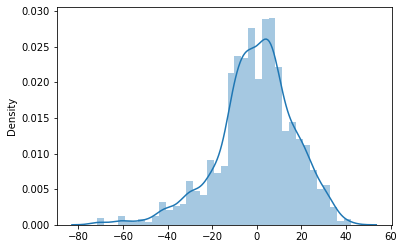

In [67]:
import seaborn as sns
sns.distplot(Y_test-predict)